<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/import_inceptionresnetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Dense, Flatten,UpSampling2D,BatchNormalization,Dropout
from keras.models import Model,load_model
from keras.applications.inception_resnet_v2 import InceptionResNetV2 , preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
IMAGE_SIZE = [300, 300]
train_path = '/content/drive/My Drive/image_data/train'
test_path = '/content/drive/My Drive/image_data/test'

In [4]:
inceptionResnet=InceptionResNetV2(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE+[3])


219062272/219055592 [==============================] - 3s 0us/step


In [0]:
for layer in inceptionResnet.layers:
  layer.trainable = False

In [6]:
folders = glob(train_path+'/*')
print(len(folders))

4


In [0]:
model = Sequential()
model.add(inceptionResnet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(len(folders), activation='softmax'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12583040  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_204 (Bat (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',rescale=1.0/255)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',rescale=1.0/255)

In [11]:
seed = 1
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical',seed=seed)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical',seed=seed)

Found 475 images belonging to 4 classes.
Found 264 images belonging to 4 classes.


In [12]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau,History,EarlyStopping

checkpoint = ModelCheckpoint(filepath='mymodel.h5',verbose=1, save_best_only=True)
history=History()
earlyStop=EarlyStopping(monitor='val_loss',patience=10)
redLearn=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

callbacks = [checkpoint,history,earlyStop,redLearn]

start = datetime.now()

history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 675s 135s/step - loss: 0.5747 - accuracy: 0.7500 - val_loss: 0.7180 - val_accuracy: 0.6980

Epoch 00001: val_loss improved from inf to 0.71804, saving model to mymodel.h5
Epoch 2/5
5/5 [==============================] - 595s 119s/step - loss: 0.5584 - accuracy: 0.7422 - val_loss: 0.6194 - val_accuracy: 0.7503

Epoch 00002: val_loss improved from 0.71804 to 0.61942, saving model to mymodel.h5
Epoch 3/5
5/5 [==============================] - 612s 122s/step - loss: 0.5616 - accuracy: 0.7629 - val_loss: 0.5773 - val_accuracy: 0.7503

Epoch 00003: val_loss improved from 0.61942 to 0.57734, saving model to mymodel.h5
Epoch 4/5
5/5 [==============================] - 593s 119s/step - loss: 0.4584 - accuracy: 0.7875 - val_loss: 0.5626 - val_accuracy: 0.7503

Epoch 00004: val_loss improved from 0.57734 to 0.56257, saving model to mymodel.h5
Epoch 5/5
5/5 [==============================] - 600s 120s/step - loss: 0.4242 - accuracy: 0.8094 - val_loss: 0.5634 -

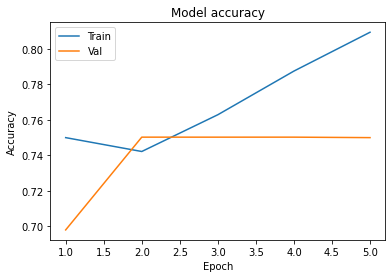

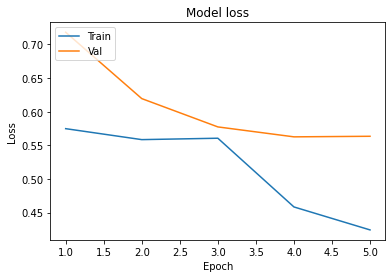

In [20]:
epoch_range=range(1,6)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [14]:
test_datagen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1.0/255)

test_set_test = test_datagen_test.flow_from_directory(test_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical',seed=seed)

loss, acc = model.evaluate_generator(test_set_test, steps=3, verbose=0)

Found 264 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [15]:
print(loss,"   ",acc)

0.5754566192626953     0.75


In [16]:
test_set_test.class_indices

{'backpack': 0, 'footwear': 1, 'glasses': 2, 'watch': 3}

array([0])

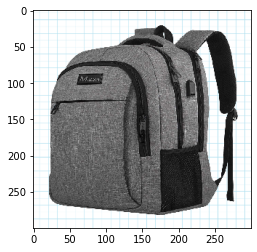

In [17]:
model=load_model('mymodel.h5')
img = image.load_img(path="/content/drive/My Drive/image_data/test/backpack/00000010.png",target_size=IMAGE_SIZE)
plt.imshow(img)
#img=cv2.resize(img, dsize=IMAGE_SIZE, interpolation=cv2.INTER_CUBIC)
img = image.img_to_array(img)
img=img/255 
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
img_class = model.predict_classes(img)
img_class

In [18]:
import os

folder_path = '/content/drive/My Drive/image_data/test/backpack/'
#model_path = '/path/to/saved/model.h5'
# dimensions of images
#img_width, img_height = 320, 240
#model = load_model(model_path)


images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=IMAGE_SIZE)
    img = image.img_to_array(img)
    img=img/255
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
